In [1]:
from surprise import Dataset, Reader
print("Surprise is working!")


Surprise is working!


In [1]:
from surprise import Dataset, Reader

# Correct column format for MovieLens ratings_small.csv
reader = Reader(
    line_format="user item rating timestamp", 
    sep=",", 
    skip_lines=1
)

data = Dataset.load_from_file("ratings_small.csv", reader=reader)

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [2]:
from surprise.model_selection import KFold, cross_validate

cv = KFold(n_splits=5, random_state=42, shuffle=True)

def evaluate(model):
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=cv, verbose=False)
    return results['test_rmse'].mean(), results['test_mae'].mean()


In [12]:
from surprise import SVD

rmse_pmf, mae_pmf = evaluate(SVD(random_state=42))
print("PMF(SVD)  RMSE:", rmse_pmf, " MAE:", mae_pmf)


PMF(SVD)  RMSE: 0.8969129397262273  MAE: 0.690928506193848


In [13]:
from surprise import KNNBasic

sim_user = {'name': 'cosine', 'user_based': True}
user_cf = KNNBasic(sim_options=sim_user)

rmse_user, mae_user = evaluate(user_cf)
print("User-based CF (cosine)  RMSE:", rmse_user, " MAE:", mae_user)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based CF (cosine)  RMSE: 0.9924490876957881  MAE: 0.7668489043526836


In [14]:
sim_item = {'name': 'cosine', 'user_based': False}
item_cf = KNNBasic(sim_options=sim_item)

rmse_item, mae_item = evaluate(item_cf)
print("Item-based CF (cosine)  RMSE:", rmse_item, " MAE:", mae_item)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Item-based CF (cosine)  RMSE: 0.9951007667300982  MAE: 0.7748047534607952


In [15]:
from surprise import SVD
rmse_pmf, mae_pmf = evaluate(SVD(random_state=42))
print("PMF (SVD)  RMSE:", rmse_pmf, " MAE:", mae_pmf)


PMF (SVD)  RMSE: 0.8969129397262273  MAE: 0.690928506193848


In [16]:
from surprise import KNNBasic
sim_user = {'name': 'cosine', 'user_based': True}
rmse_user, mae_user = evaluate(KNNBasic(sim_options=sim_user))
print("User-based CF (cosine)  RMSE:", rmse_user, " MAE:", mae_user)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based CF (cosine)  RMSE: 0.9924490876957881  MAE: 0.7668489043526836


In [17]:
from surprise import SVD

rmse_pmf, mae_pmf = evaluate(SVD(random_state=42))
print("PMF (SVD)  RMSE:", rmse_pmf, " MAE:", mae_pmf)

PMF (SVD)  RMSE: 0.8969129397262273  MAE: 0.690928506193848


In [25]:
!pip install pandas
sims = ["cosine", "msd", "pearson"]
results = []

for sim in sims:
    # User-based
    rmse_u, mae_u = evaluate(KNNBasic(sim_options={'name': sim, 'user_based': True}))
    results.append([sim, 'user', rmse_u, mae_u])
    
    # Item-based
    rmse_i, mae_i = evaluate(KNNBasic(sim_options={'name': sim, 'user_based': False}))
    results.append([sim, 'item', rmse_i, mae_i])

import pandas as pd
df_sims = pd.DataFrame(results, columns=['similarity', 'type', 'rmse', 'mae'])
df_sims


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

,similarity,type,rmse,mae
0,cosine,user,0.992449,0.766849
1,cosine,item,0.995101,0.774805
2,msd,user,0.967055,0.743468
3,msd,item,0.934569,0.721062
4,pearson,user,0.997644,0.772742
5,pearson,item,0.989119,0.768502


In [26]:
Ks = [5, 10, 20, 40, 60]
results_k = []

best_user_sim = "msd"
best_item_sim = "msd"

for k in Ks:
    # User-based CF
    rmse_u, mae_u = evaluate(
        KNNBasic(k=k, sim_options={"name": best_user_sim, "user_based": True})
    )
    results_k.append(["user", k, rmse_u, mae_u])
    
    # Item-based CF
    rmse_i, mae_i = evaluate(
        KNNBasic(k=k, sim_options={"name": best_item_sim, "user_based": False})
    )
    results_k.append(["item", k, rmse_i, mae_i])

df_k = pd.DataFrame(results_k, columns=["type", "k", "rmse", "mae"])
df_k


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,type,k,rmse,mae
0,user,5,0.985531,0.754557
1,item,5,1.021982,0.790375
2,user,10,0.964278,0.737698
3,item,10,0.974982,0.754549
4,user,20,0.961876,0.737475
5,item,20,0.947610,0.732601
6,user,40,0.967055,0.743468
7,item,40,0.934569,0.721062
8,user,60,0.970813,0.747578
9,item,60,0.931825,0.718490


In [20]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Split user-based and item-based results
df_user = df_k[df_k['type'] == 'user']
df_item = df_k[df_k['type'] == 'item']

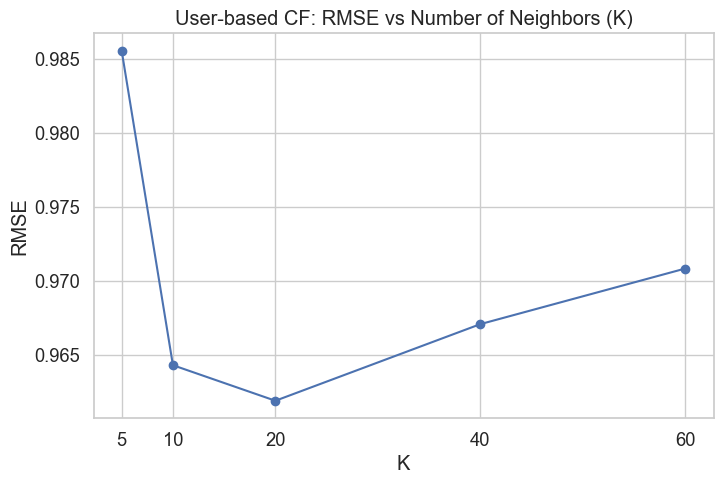

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df_user['k'], df_user['rmse'], marker='o', label="User-based (RMSE)")
plt.title("User-based CF: RMSE vs Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.xticks(df_user['k'])
plt.grid(True)
plt.show()


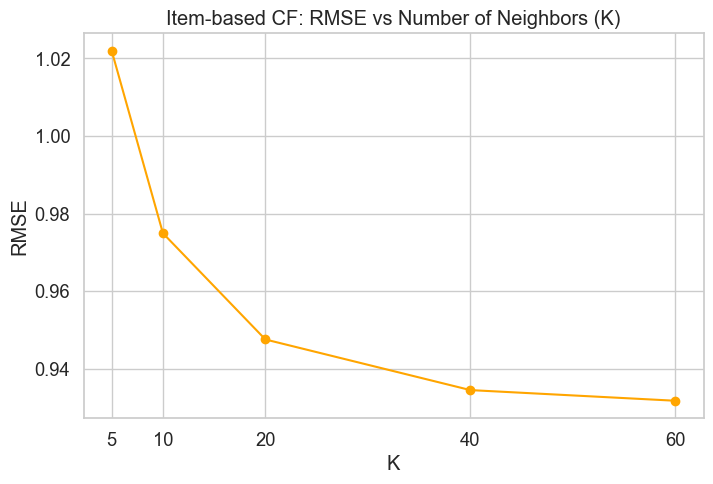

In [23]:
plt.figure(figsize=(8,5))
plt.plot(df_item['k'], df_item['rmse'], marker='o', color='orange', label="Item-based (RMSE)")
plt.title("Item-based CF: RMSE vs Number of Neighbors (K)")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.xticks(df_item['k'])
plt.grid(True)
plt.show()


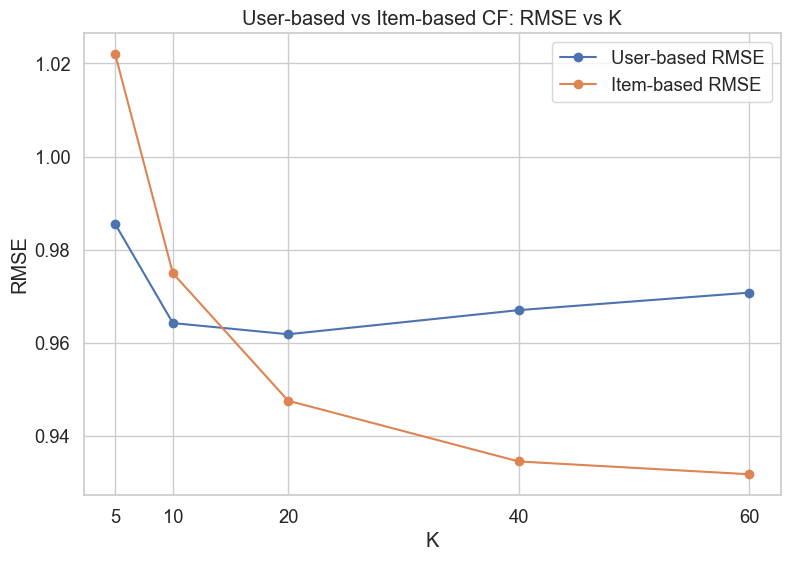

In [24]:
plt.figure(figsize=(9,6))
plt.plot(df_user['k'], df_user['rmse'], marker='o', label="User-based RMSE")
plt.plot(df_item['k'], df_item['rmse'], marker='o', label="Item-based RMSE")
plt.title("User-based vs Item-based CF: RMSE vs K")
plt.xlabel("K")
plt.ylabel("RMSE")
plt.xticks(df_user['k'])
plt.legend()
plt.grid(True)
plt.show()
